In [1]:
#import
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
%matplotlib inline
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'

In [2]:
#数据集导入
(train_image,train_label), (test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()
#归一化
train_image = train_image/255
test_image = test_image/255
#独热
train_label_onehot = tf.keras.utils.to_categorical(train_label)
test_label_onehot = tf.keras.utils.to_categorical(test_label)

60000
(60000,)
(10000, 28, 28)
(10000,)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.  

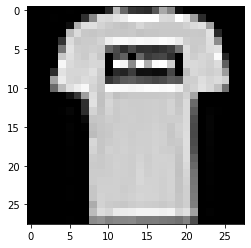

In [3]:
#显示数据集信息
print(train_image.shape[0])
print(train_label.shape)
print(test_image.shape)
print(test_label.shape)
print(train_image[0])
print(train_image[0])
print(train_label_onehot)
plt.imshow(train_image[1],cmap='gray')

In [4]:
#建立网络
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#模型信息
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [5]:
#随机进行反色处理
train_image_inverted = train_image
for i in range(0,train_image_inverted.shape[0]-1):
    if(random.randint(0,1)):
        train_image_inverted[i] = 1 - train_image_inverted[i]
print(train_image_inverted[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.08627451 0.4627451  0.09411765
  0.         0.         0.         0.         0.         0.18823529
  0.34509804 0.01960784 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.04705882 0.39215686 0.83137255 0.80392157
  0.7254902  0.70196078 0.67843137 0.72941176 0.75686275 0.86666667
  0.55686275 0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.33333333 0.29803922 0.78039216
  0.88235294 0.97254902 1.         0.93333333 0.88627451 0.61568627
  0.26666667 0.31372549 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.     

In [8]:
#编译并运行
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history = model.fit(train_image_inverted, train_label_onehot, epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3008 - acc: 0.8882
Epoch 2/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2938 - acc: 0.8915
Epoch 3/100
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2854 - acc: 0.8948
Epoch 4/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2802 - acc: 0.8963
Epoch 5/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2724 - acc: 0.9002
Epoch 6/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2667 - acc: 0.9012
Epoch 7/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2618 - acc: 0.9022
Epoch 8/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2573 - acc: 0.9033
Epoch 9/100
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2538 - acc: 0.9055
Epoch 10/100
60000/60000 [========================

KeyboardInterrupt: 

In [ ]:
#测试
model.evaluate(test_image,test_label_onehot)

In [ ]:
#读取并转换为28行28列数组,接着进行归一化
input = Image.open('d:\\3.jpg')
input = input.resize((28,28),resample = Image.BILINEAR)
input_gray = input.convert('L')
plt.imshow(input_gray,cmap = 'gray')
to_predict = np.asarray(input_gray)
to_predict = to_predict/255

#数组升维，接着进行预测
to_predict = np.expand_dims(to_predict, axis=0)
tag_onehot = model.predict(to_predict)
possibility = 0
for i in range(0,9):
    if possibility < tag_onehot[0][i]:
        possibility = tag_onehot[0][i]
        flag = i
dict={
    0:'T-Shirt/Top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandals',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boots'
}
print(flag)
print(dict[flag], end=" ")
print('with a', end=" ")
print(possibility, end=" ")
print('confidence')
